# Baseline Analysis

- Run a set of standard machine learning algorithms to get a baseline accuracy measurement.
- Methods include: decision trees, random forests, linear and logistic regression, and support vector machines (SVMs)

In [1]:
# install packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interp

from sklearn import tree
from sklearn.svm import SVC
from sklearn.svm.libsvm import predict_proba
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import model_selection, preprocessing
from sklearn.metrics import (precision_score, recall_score, f1_score, 
precision_recall_fscore_support, roc_curve, auc, roc_auc_score) 
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

<H2> Load data from csv to pandas dataframe

In [2]:
df = pd.read_csv('data/cleanData/final_data.csv')
df_feature_data = df.drop(['class_label'], axis = 1)
df_feature_data = df_feature_data.values
df_label_data = df['class_label'].values

<H2> k-fold cross validation

In [3]:
n_splits = 10
skf = StratifiedKFold(n_splits,random_state=1)
skf.get_n_splits(df_feature_data,df_label_data)

10

<H2> Perform Baseline Analyses

### Decision Tree

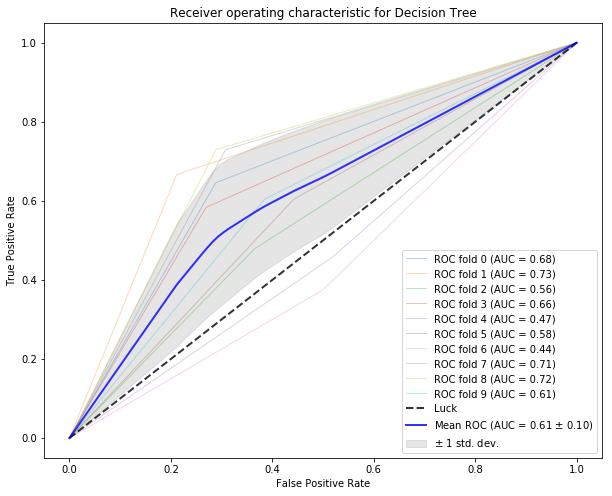


Average F1 Score:0.5940411665650228
Average AUC: 0.6149038461538462


In [11]:
decisiontree_classifier = tree.DecisionTreeClassifier(random_state = 1)
auc_list = []
f1score_list = []
tpr_linear = []
mean_fpr = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(10,8))

count = 0
for train_index, test_index in skf.split(df_feature_data, df_label_data):
    # train and test model
    decisiontree_classifier.fit(df_feature_data[train_index],df_label_data[train_index])
    y_pred_prob = decisiontree_classifier.predict_proba(df_feature_data[test_index])[:,1]
    y_pred_bin = decisiontree_classifier.predict(df_feature_data[test_index])
    
    # compute different accuracy measurements
    f1 = f1_score(df_label_data[test_index], y_pred_bin, pos_label=1, average='binary')
    f1score_list.append(f1)
    
    fpr, tpr, thresholds = roc_curve(df_label_data[test_index], y_pred_prob, pos_label=1)
    tpr_linear.append(interp(mean_fpr, fpr, tpr)) 
    tpr_linear[-1][0] = 0.0
    
    curr_auc = auc(fpr, tpr)
    auc_list.append(curr_auc)
    
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (count, curr_auc))
    
    count = count + 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tpr_linear, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(auc_list)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tpr_linear, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.show()

fig.savefig('results/baseline/decision_tree_roc_curve.png')
    
print("\nAverage F1 Score:" + str(sum(f1score_list)/n_splits)+
      "\nAverage AUC: "+ str(sum(auc_list)/n_splits))

### Random Forest

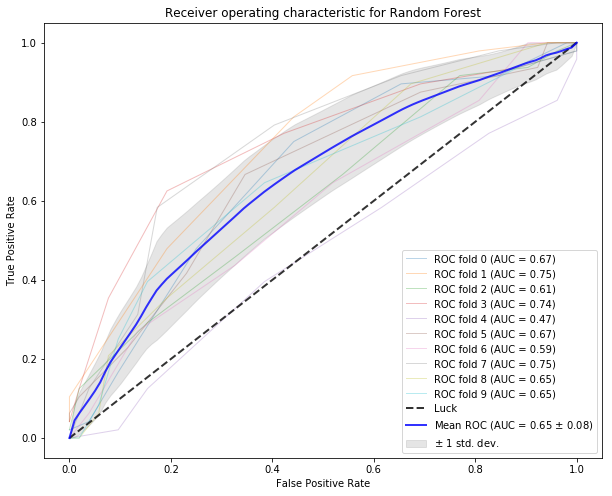


Average F1 Score: 0.5347062822072335
Average AUC: 0.6547075320512821


In [12]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier = RandomForestClassifier(random_state = 1)
auc_list = []
f1score_list = []
tpr_linear = []
mean_fpr = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(10,8))

count = 0
for train_index, test_index in skf.split(df_feature_data, df_label_data):
    # train and test model
    randomforest_classifier.fit(df_feature_data[train_index],df_label_data[train_index])
    y_pred_prob = randomforest_classifier.predict_proba(df_feature_data[test_index])[:,1]
    y_pred_bin = randomforest_classifier.predict(df_feature_data[test_index])
    
    # compute different accuracy measurements
    f1 = f1_score(df_label_data[test_index], y_pred_bin, pos_label=1, average='binary')
    f1score_list.append(f1)

    fpr, tpr, thresholds = roc_curve(df_label_data[test_index], y_pred_prob, pos_label=1)
    tpr_linear.append(interp(mean_fpr, fpr, tpr)) 
    tpr_linear[-1][0] = 0.0    
    
    curr_auc = auc(fpr, tpr)
    auc_list.append(curr_auc)
        
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (count, curr_auc))
    
    count = count + 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tpr_linear, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(auc_list)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tpr_linear, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Random Forest')
plt.legend(loc="lower right")
plt.show()

fig.savefig('results/baseline/random_forest_roc_curve.png')
    
print("\nAverage F1 Score: "+ str(sum(f1score_list)/n_splits)+
      "\nAverage AUC: "+ str(sum(auc_list)/n_splits))

### Linear SVM

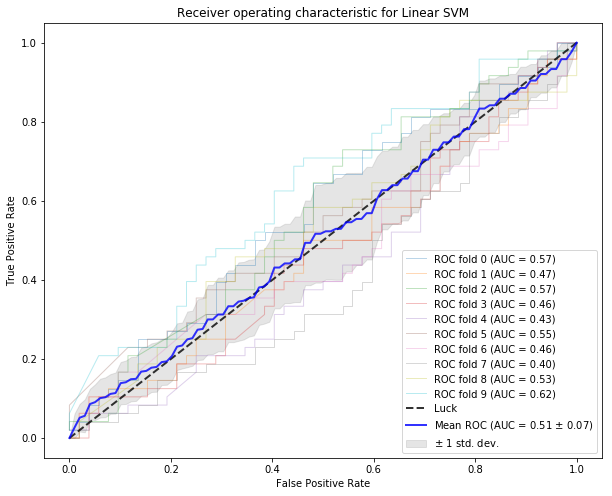


Average F1 Score: 0.46472307517445355
Average AUC: 0.5073317307692308


In [13]:
from sklearn import svm
svm_clf = svm.SVC(kernel = 'linear', probability = True, random_state = 1)
f1score_list = []
auc_list = []
tpr_linear = []
mean_fpr = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(10,8))

count = 0
for train_index, test_index in skf.split(df_feature_data, df_label_data):
    # train and test model
    svm_clf.fit(df_feature_data[train_index],df_label_data[train_index])
    y_pred_prob = svm_clf.predict_proba(df_feature_data[test_index])[:,1]
    y_pred_bin = svm_clf.predict(df_feature_data[test_index])
    
    # compute different accuracy measurements
    f1 = f1_score(df_label_data[test_index], y_pred_bin, pos_label=1, average='binary')
    f1score_list.append(f1)

    fpr, tpr, thresholds = roc_curve(df_label_data[test_index], y_pred_prob, pos_label=1)
    tpr_linear.append(interp(mean_fpr, fpr, tpr)) 
    tpr_linear[-1][0] = 0.0    
    
    curr_auc = auc(fpr, tpr)
    auc_list.append(curr_auc)
    
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (count, curr_auc))
    
    count = count + 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tpr_linear, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(auc_list)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tpr_linear, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Linear SVM')
plt.legend(loc="lower right")
plt.show()

fig.savefig('results/baseline/linear_svm_roc_curve.png')

print("\nAverage F1 Score: "+ str(sum(f1score_list)/n_splits)+
      "\nAverage AUC: "+ str(sum(auc_list)/n_splits))

### SVM (RBF)

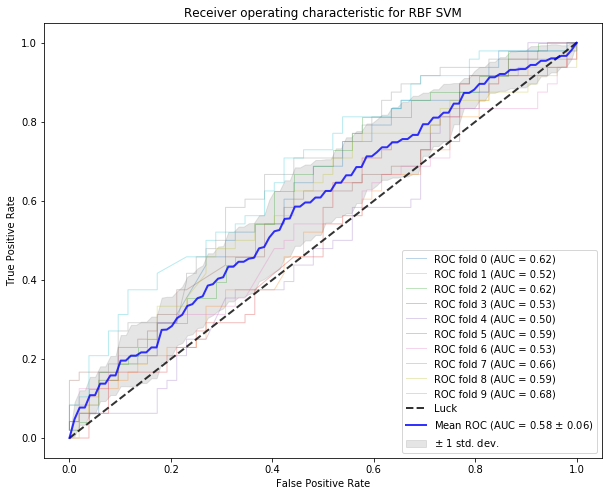


Average F1 Score: 0.4840257766114098
Average AUC: 0.5849158653846154


In [14]:
from sklearn import svm
svm_clf = svm.SVC(kernel = 'rbf', probability = True, random_state = 1)
f1score_list = []
auc_list = []
tpr_linear = []
mean_fpr = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(10,8))

count = 0
for train_index, test_index in skf.split(df_feature_data, df_label_data):
    # train and test model
    svm_clf.fit(df_feature_data[train_index],df_label_data[train_index])
    y_pred_prob = svm_clf.predict_proba(df_feature_data[test_index])[:,1]
    y_pred_bin = svm_clf.predict(df_feature_data[test_index])
    
    # compute different accuracy measurements
    f1 = f1_score(df_label_data[test_index], y_pred_bin, pos_label=1, average='binary')
    f1score_list.append(f1)

    fpr, tpr, thresholds = roc_curve(df_label_data[test_index], y_pred_prob, pos_label=1)
    tpr_linear.append(interp(mean_fpr, fpr, tpr)) 
    tpr_linear[-1][0] = 0.0
    
    curr_auc = auc(fpr, tpr)
    auc_list.append(curr_auc)
    
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (count, curr_auc))
    
    count = count + 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tpr_linear, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(auc_list)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tpr_linear, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for RBF SVM')
plt.legend(loc="lower right")
plt.show()

fig.savefig('results/baseline/rbf_svm_roc_curve.png')

print("\nAverage F1 Score: "+ str(sum(f1score_list)/n_splits)+
      "\nAverage AUC: "+ str(sum(auc_list)/n_splits))

### SVM (Polynomial degree 2)

In [ ]:
from sklearn import svm
svm_clf = svm.SVC(kernel = 'poly', degree = 2, probability = True, random_state = 1)
f1score_list = []
auc_list = []
tpr_linear = []
mean_fpr = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(10,8))

count = 0
for train_index, test_index in skf.split(df_feature_data, df_label_data):
    # train and test model
    svm_clf.fit(df_feature_data[train_index],df_label_data[train_index])
    y_pred_prob = svm_clf.predict_proba(df_feature_data[test_index])[:,1]
    y_pred_bin = svm_clf.predict(df_feature_data[test_index])
    
    # compute different accuracy measurements
    f1 = f1_score(df_label_data[test_index], y_pred_bin, pos_label=1, average='binary')
    f1score_list.append(f1)

    fpr, tpr, thresholds = roc_curve(df_label_data[test_index], y_pred_prob, pos_label=1)
    tpr_linear.append(interp(mean_fpr, fpr, tpr)) 
    tpr_linear[-1][0] = 0.0
    
    curr_auc = auc(fpr, tpr)
    auc_list.append(curr_auc)
    
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (count, curr_auc))
    
    count = count + 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tpr_linear, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(auc_list)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tpr_linear, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SVM (Polynomial degree 2)')
plt.legend(loc="lower right")
plt.show()

fig.savefig('results/baseline/polynomial_degree_2_svm_roc_curve.png')
    
print("\nAverage F1 Score: "+ str(sum(f1score_list)/n_splits)+
      "\nAverage AUC: "+ str(sum(auc_list)/n_splits))

### Linear Regression

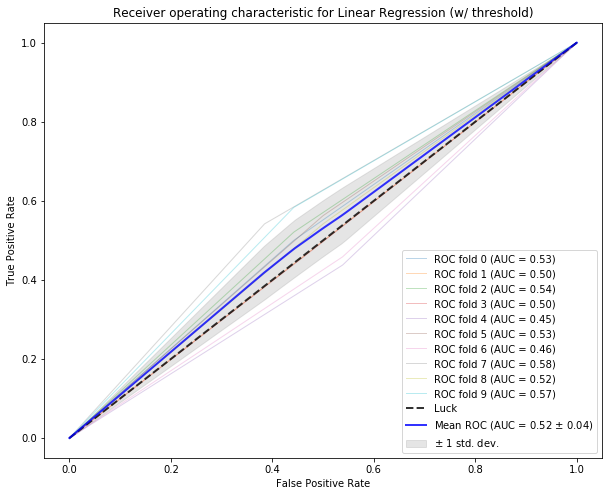


Average F1 Score: 0.5028819067200903
Average AUC: 0.5176282051282051


In [9]:
linreg = LinearRegression()
f1score_list = []
auc_list = []
tpr_linear = []
mean_fpr = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(10,8))

count = 0
for train_index, test_index in skf.split(df_feature_data, df_label_data):
    # train and test model
    linreg.fit(df_feature_data[train_index], df_label_data[train_index])
    y_pred = linreg.predict(df_feature_data[test_index])
    
    # apply a threshold (using mean value)
    thresh = round(np.mean(y_pred), 2)    
    # note that if the predictions are all 0, then the thresh will be inf
    if(thresh > 1):
        thresh = 0.5
    y_pred = np.where(y_pred > thresh, 1, 0)
    #print(thresh)
    
    # compute different accuracy measurements
    f1 = f1_score(df_label_data[test_index], y_pred, pos_label=1, average='binary')
    f1score_list.append(f1)

    fpr, tpr, thresholds = roc_curve(df_label_data[test_index], y_pred, pos_label=1)
    tpr_linear.append(interp(mean_fpr, fpr, tpr)) 
    tpr_linear[-1][0] = 0.0    
    
    curr_auc = auc(fpr, tpr)
    auc_list.append(curr_auc)  
    
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (count, curr_auc))
    
    count = count + 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tpr_linear, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(auc_list)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tpr_linear, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Linear Regression (w/ threshold)')
plt.legend(loc="lower right")
plt.show()
    
    
print("\nAverage F1 Score: "+ str(sum(f1score_list)/n_splits)+
      "\nAverage AUC: "+ str(sum(auc_list)/n_splits))  

### Logistic Regression

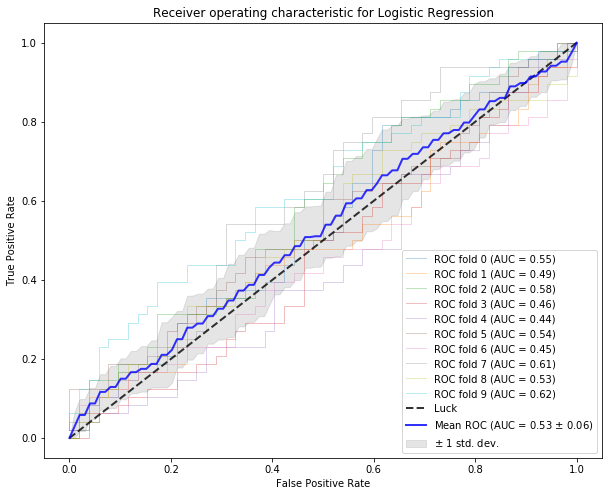


Average F1 Score: 0.46018141508628235
Average AUC: 0.526602564102564


In [10]:
logreg = LogisticRegression(random_state = 1)
f1score_list = []
auc_list = []
tpr_linear = []
mean_fpr = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(10,8))

count = 0
for train_index, test_index in skf.split(df_feature_data, df_label_data):
    logreg.fit(df_feature_data[train_index], df_label_data[train_index])
    y_pred_prob = logreg.predict_proba(df_feature_data[test_index])[:,1]
    y_pred_bin = logreg.predict(df_feature_data[test_index])
    
    # compute different accuracy measurements
    f1 = f1_score(df_label_data[test_index], y_pred_bin, pos_label=1, average='binary')
    f1score_list.append(f1)

    fpr, tpr, thresholds = roc_curve(df_label_data[test_index], y_pred_prob, pos_label=1)
    tpr_linear.append(interp(mean_fpr, fpr, tpr)) 
    tpr_linear[-1][0] = 0.0  
    
    curr_auc = auc(fpr, tpr)
    auc_list.append(curr_auc)
    
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
         label='ROC fold %d (AUC = %0.2f)' % (count, curr_auc))
    
    count = count + 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tpr_linear, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(auc_list)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tpr_linear, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.show()    
    
print("\nAverage F1 Score: "+ str(sum(f1score_list)/n_splits)+
      "\nAverage AUC: "+ str(sum(auc_list)/n_splits)) 